In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("cookie_cats.csv", sep=',')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


<Axes: xlabel='version', ylabel='count'>

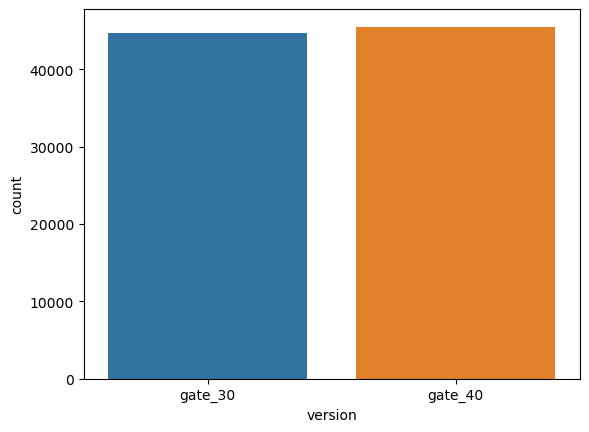

In [113]:
df30 = df[df['version'] == 'gate_30']
df40 = df[df['version'] == 'gate_40']
sns.countplot(df, x=df['version'])

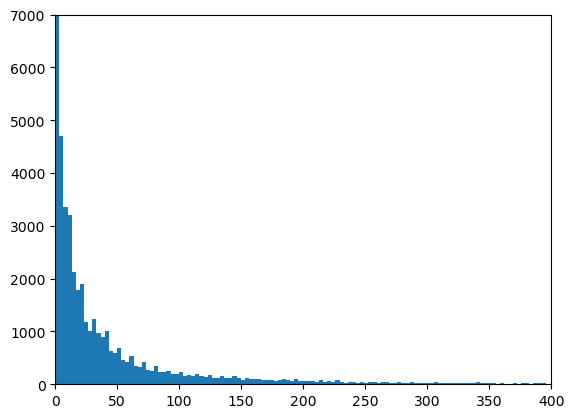

In [87]:
fig, ax = plt.subplots()
ax.hist(df30[df30['sum_gamerounds'] < 1000]['sum_gamerounds'], 300)
ax.set(xlim=(0, 400), ylim = (0, 7000))
plt.show()

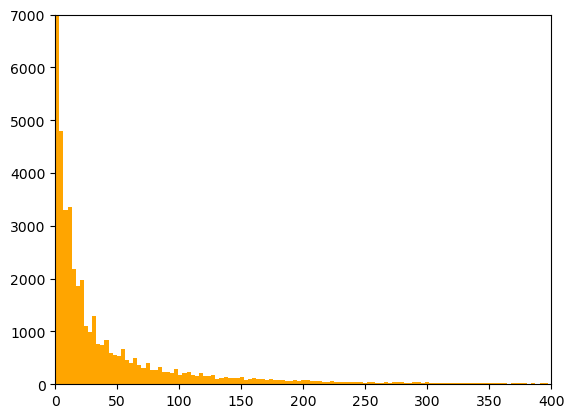

In [89]:
fig, ax = plt.subplots()
ax.hist(df40[df40['sum_gamerounds'] < 1000]['sum_gamerounds'], 300, color='orange')
ax.set(xlim=(0, 400), ylim = (0, 7000))
plt.show()

In [91]:
print(df30['sum_gamerounds'].mean(), df40['sum_gamerounds'].mean())

52.45626398210291 51.29877552814966


In [93]:
print(df30['retention_1'].mean(), df40['retention_1'].mean())

0.4481879194630872 0.44228274967574577


In [95]:
print(df30['retention_7'].mean(), df40['retention_7'].mean())

0.19020134228187918 0.18200004396667327


<h2> Start of A/B Testings<br></h2>
Let's fix alpha = 0.05 <br>
For sum_gamerounds mean value we will use Ztest for mean:

In [98]:
from statsmodels.stats.weightstats import ztest

_, pval = ztest(df30['sum_gamerounds'], df40['sum_gamerounds'], value = 0, alternative='larger')
pval

0.1864531527075341

<br>
For retentions we will use Ztest for proportions

In [101]:
from statsmodels.stats.proportion import proportions_ztest

n = [df30['retention_1'].count(), df40['retention_1'].count()]
s = [df30['retention_1'].sum(), df40['retention_1'].sum()]

_, pval = proportions_ztest(s, n, value = 0, alternative='larger')
pval

0.03720482764845957

<h3>The hypo of equality of retentions_1 is rejected</h3>

In [108]:
n = [df30['retention_7'].count(), df40['retention_7'].count()]
s = [df30['retention_7'].sum(), df40['retention_7'].sum()]

_, pval = proportions_ztest(s, n, value = 0, alternative='larger')
pval

0.0007771249878071645

<h3>The hypo of equality of retentions_7 is rejected too</h3>